# Social Graphs and Interactions - 02805 - Assignment 1

<font size="2"> *Note*: The notebook is structured so that you can re-run it and regenerate the results. The graphs are re-generated and the wiki pages are downloaded and processed on the go (and not loaded from disk). You are welcome to re-run the notebook but beware that it could take some minutes! </font>

# Part One: Network Models

## Watts-Strogatz Networks

* *Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. Describe what happens to the network when p = 1.*


=== p=0.00 ===
Average shortest path: 62.875752
Average distance according to small world model: 4.482892


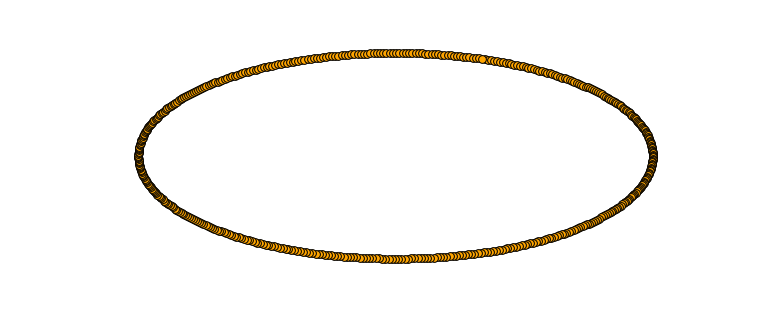

=== p=0.10 ===
Average shortest path: 7.330806
Average distance according to small world model: 4.482892


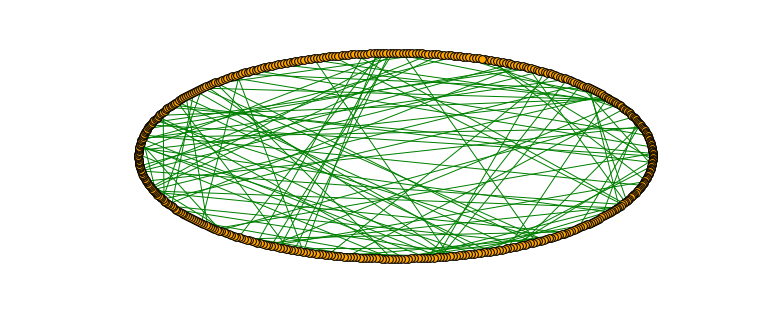

=== p=1.00 ===
Average shortest path: 4.757435
Average distance according to small world model: 4.482892


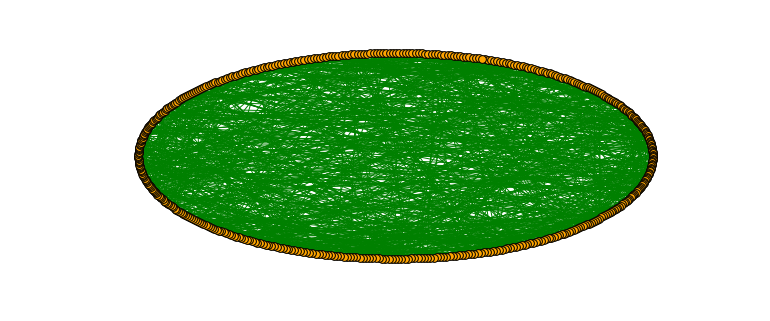

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Parameters
k_avg_ws = 4
N_ws = 500
p1_ws = 0
p2_ws = 0.1
p3_ws = 1

def draw_graph(i,N,k,p, pos=None):
    G = nx.watts_strogatz_graph(N,k,p)
    d = nx.average_shortest_path_length(G)
    avg_distance = np.log(N)/np.log(k)
    if pos == None:
        pos = nx.spectral_layout(G)
    plt.figure(num=i,figsize=(10, 4), dpi=80)
    nx.draw(G,pos, node_color='orange', edge_color='g', node_size=60)
    print '=== p=%.2f ===\nAverage shortest path: %f\n'\
        'Average distance according to small world model: %f' %(p, d,avg_distance)
    plt.show()
    return pos
    
# Avg shortest paths
model_layout_ws = draw_graph(1,N_ws,k_avg_ws,p1_ws)
_               = draw_graph(2,N_ws,k_avg_ws,p2_ws, model_layout_ws)
_               = draw_graph(3,N_ws,k_avg_ws,p3_ws, model_layout_ws)

When $p = 0$, each node is connected only to its close neighbours; the graph looks like a big ring, and the shortest path going from any node to any other needs to walk at worst half of the ring (and at best one link). On average, the path will have to walk one quarter of the ring (125 nodes), but since any node is connected to 4 neighbours, each step in one direction skips one node. This means that we would expect an average path length of $\frac{125}{2}=62.5$, very close to the one obtained above.

If we let $p$ grow until $0.1$, we are basically rewiring one edge every ten. This sounds like a small probability, but in fact this rewiring occurs randomly, and this stands in our favour. Pick any two nodes: in most of the cases we will be able to walk one of the randomly rewired links, and with it skip a big part of the panoramic walk we were having in the previous case, chopping down the average distance to less than 8 steps.

When $p = 1$, every link between close nodes is rewired, which means that the final links have a high degree of randomness. The edges are still not completely random, because only one of two endpoints is rewired for each edge. this is more than enough, though, to guarantee that far away nodes in our previous ring are now easily reachable (in most of the cases) using these random shortcuts. Now the average path length is around $4.7$, becoming *very close* to the average path length predicted in the small world model ($4.48$).

* *Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.*

In [2]:
probabilities = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_d_each_p = []
std_d_each_p = []

for p in probabilities:
    print 'Generating networks for p = %.2f ...' % (p)
    nets_this_p = []
    avg_d_this_p = []
    for i in range(50):
        G_ws = nx.watts_strogatz_graph(N_ws, k_avg_ws, p)
        nets_this_p.append(G_ws)
        avg_d_this_p.append(nx.average_shortest_path_length(G_ws))
    avg_d_each_p.append(np.mean(avg_d_this_p))
    std_d_each_p.append(np.std(avg_d_this_p))

Generating networks for p = 0.00 ...
Generating networks for p = 0.01 ...
Generating networks for p = 0.03 ...
Generating networks for p = 0.05 ...
Generating networks for p = 0.10 ...
Generating networks for p = 0.20 ...


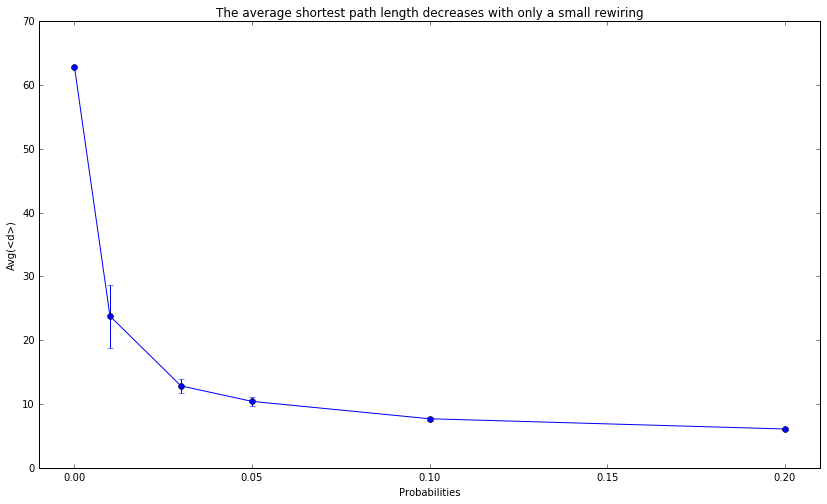

In [3]:
plt.figure(num=4,figsize=(14, 8), dpi=80)
plt.axis([-0.01, 0.21, 0, 70])
plt.xlabel('Probabilities')
plt.ylabel('Avg(<d>)')
plt.title('The average shortest path length decreases with only a small rewiring')
plt.errorbar(probabilities, avg_d_each_p, fmt='bo-', xerr=0, yerr=std_d_each_p)
plt.show()

In the graph above we can appreciate how a small probability of rewiring can be sufficient to cause the shortest path length to drop. E.g., with $p=0.01$ we already experience a cut of more than 50% on the average path length (the big error is caused by the fact that only one edge every 100 is rewired, therefore we have a great difference between "lucky pairs" of nodes that are close to one of these convenient shortcuts, and "unlucky pairs" that will still to do a long walk to meet each other). With $p=0.03$ the error (standard deviation) drops, and the average path length is already one fifth of the original one; this value decreases then slowly as $p$ increases.

## The Barabasi-Albert Model

*We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:*
* *Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.*

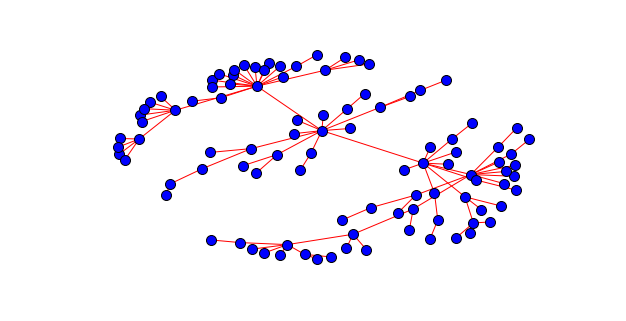

In [4]:
import random as rnd
N_ba = 100
G_ba = nx.Graph()

# First simple edge between nodes (1) and (2) (also adds the nodes)
G_ba.add_edge(1,2)

def pref_attach_nodes(G,start,end):
    for i in range(start,end+1):
        flat_list = [e for link in G.edges() for e in link]
        G.add_edge(rnd.choice(flat_list),i) # also adds the node

# Adding nodes and links until N
pref_attach_nodes(G_ba,3,N_ba)

plt.figure(num=5,figsize=(8,4),dpi=80)
layout_k_ba = .5 / (np.sqrt( len(G_ba.nodes()) )) # half the default split factor
nx.draw(G_ba,
         node_color='blue',edge_color='r',node_size=100,
         pos = nx.spring_layout(G_ba, k=layout_k_ba)
        )
plt.show()

* *Now create a 5000 node network.*
    * *What's the maximum and minimum degree?*
    * *Now, bin the degree distribution, for example using numpy.histogram.*
    * *Plot the distribution. Plot it with both linear and log-log axes.*

Building and plotting the huge graph (5K nodes)
 This is going to take a couple of minutes...


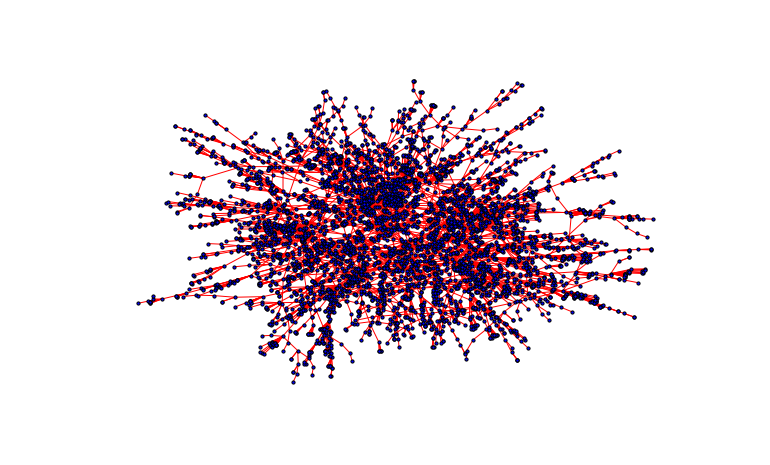

In [5]:
print 'Building and plotting the huge graph (5K nodes)\n' \
        ' This is going to take a couple of minutes...'

M_ba = 5000
pref_attach_nodes(G_ba, N_ba+1, M_ba)

plt.figure(num=6,figsize=(10,6),dpi=80)
pos_ba = nx.spring_layout(G_ba)
nx.draw(G_ba, pos_ba, node_color='blue', edge_color='r', node_size=10)
plt.show()

In [6]:
bins_content_ba = G_ba.degree().values() # defaults to all nodes
    
k_max_ba = max(bins_content_ba)
k_min_ba = min(bins_content_ba)

print 'Maximum degree:', k_max_ba
print 'Minimum degree:', k_min_ba

Maximum degree: 139
Minimum degree: 1


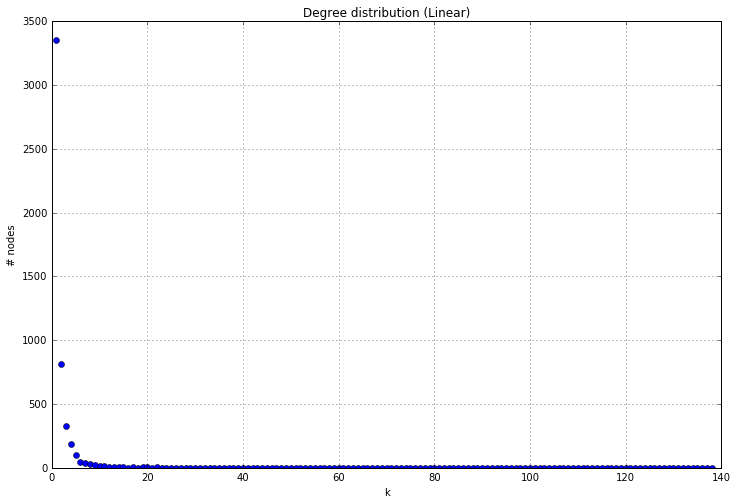

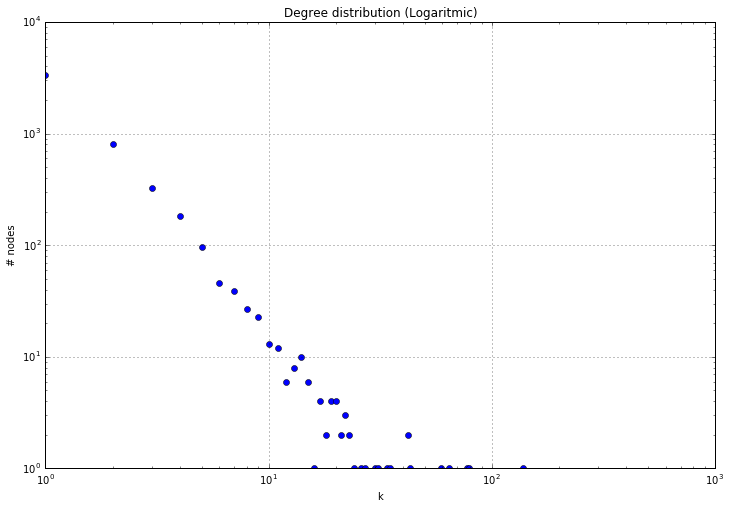

In [7]:
bins_ba = range(k_min_ba, k_max_ba)
hist_ba, bin_edges_ba = np.histogram(bins_content_ba, bins=(k_max_ba-k_min_ba))

# Linear axes:
plt.figure(num=7, figsize=(12,8), dpi=80)
plt.plot(bins_ba,hist_ba,'bo')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('# nodes')
plt.title("Degree distribution (Linear)")
plt.show()

# Logaritmic axes:
plt.figure(num=8, figsize=(12,8), dpi=80)
plt.loglog(bins_ba, hist_ba, 'bo')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('# nodes')
plt.title("Degree distribution (Logaritmic)")
plt.show()

Observe how the degrees range from 1 to approximately 120-150. The degree distribution is unbalanced: a lot of nodes with degree 1 (around 3000 depending on the run), and fewer for bigger degrees, until reaching a very small number (1 node) having the highest degree: that's our biggest hub!

## Power-laws and the friendship paradox
*Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:*

*Pick a node i at random (e.g. use random.choice). Find its degree.
Find i's neighbors. And calculate their average degree.
Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.*



In [8]:
print '=== First random node ==='

a_node = rnd.choice(G_ba.nodes())
degree = G_ba.degree(a_node)
print 'Node %d, Degree: %d' %(a_node, degree)

neighbors = nx.neighbors(G_ba, a_node)
print 'Neighbors of node %d: ' %a_node, neighbors
neighbors_degrees = [G_ba.degree(elm) for elm in neighbors]
avg_neighbors_degree = np.average(neighbors_degrees)

print "Average neighbor's degree: %.2f" %avg_neighbors_degree
print
print "Do %d's friends, on average, have more friends than %d?" \
        %(a_node, a_node), avg_neighbors_degree > degree


=== First random node ===
Node 793, Degree: 1
Neighbors of node 793:  [425]
Average neighbor's degree: 12.00

Do 793's friends, on average, have more friends than 793? True


Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [9]:
print '=== 1000 random nodes ==='

results = {True: 0, False: 0}

# It's better to define a function:
def friendship_paradox(G,results):
    i = rnd.choice(G.nodes())
    degree = G.degree(i)
    neighbors = nx.neighbors(G,i)
    neighbors_degrees = G.degree(neighbors).values()
    avg_neighbors_degree = np.average(neighbors_degrees)
    results[avg_neighbors_degree > degree]+=1

times = 1000
for i in range(times):
    friendship_paradox(G_ba,results)
print 'The Friendship Paradox is true %d times out of %d' %(results[True],times)

=== 1000 random nodes ===
The Friendship Paradox is true 876 times out of 1000


## Growth without preferential attachment
*Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.*

*Compare the network you've just built to the ER network of same size and same p. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.*

BA graph has 4999 edges, degrees in range [1 - 139]
ER graph has 5038 edges, degrees in range [0 - 8]
BA graph has 1 connected components
ER graph has 732 connected components


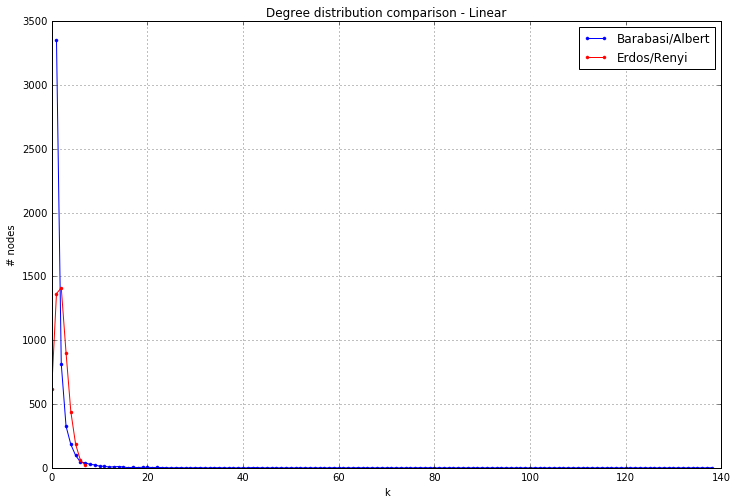

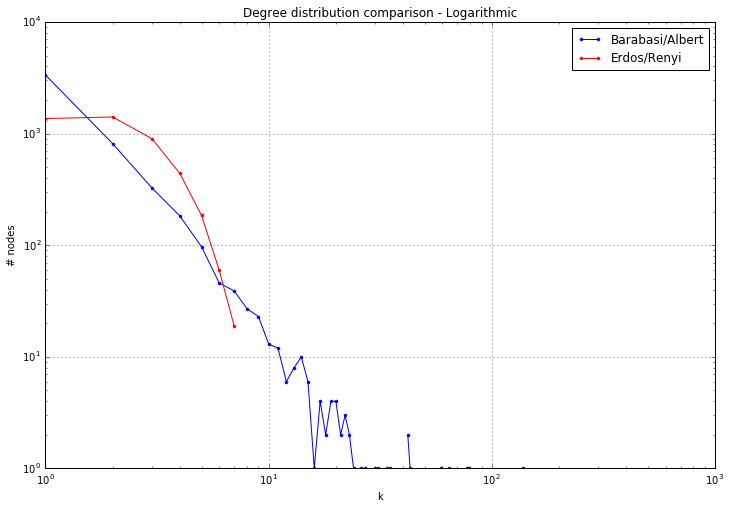

In [10]:
#Build a network:
k = np.mean(G_ba.degree(G_ba.nodes()).values())
p = k/M_ba
ER = nx.erdos_renyi_graph(M_ba,p)
er_degrees = [ER.degree(node) for node in ER.nodes()]
ba_degrees = [G_ba.degree(node) for node in G_ba.nodes()]
er_k_max = max(er_degrees)
er_k_min = min(er_degrees)

print 'BA graph has %d edges, degrees in range [%d - %d]' %(len(G_ba.edges()),k_min_ba,k_max_ba)
print 'ER graph has %d edges, degrees in range [%d - %d]' %(len(ER.edges()),er_k_min,er_k_max)

er_comp = sorted(nx.connected_components(ER),key=len,reverse=True)
ba_comp = sorted(nx.connected_components(G_ba),key=len,reverse=True)

print 'BA graph has %d connected components' %len(ba_comp)
print 'ER graph has %d connected components' %len(er_comp)

er_hist,er_edges = np.histogram(er_degrees,er_k_max-er_k_min)
ba_hist,ba_edges = np.histogram(ba_degrees,k_max_ba-k_min_ba)

er_bins = range(er_k_min,er_k_max)

#Linear plot
plt.figure(num=9,figsize=(12,8),dpi=80)
plt.plot(bins_ba,ba_hist,'.-b',label='Barabasi/Albert')
plt.plot(er_bins,er_hist,'.-r',label="Erdos/Renyi")
plt.grid(True)
plt.xlabel('k')
plt.ylabel('# nodes')
plt.title('Degree distribution comparison - Linear')
plt.legend()

#Logarithim plot
plt.figure(num=10,figsize=(12,8),dpi=80)
plt.loglog(bins_ba,ba_hist,'.-b',label='Barabasi/Albert')
plt.loglog(er_bins,er_hist,'.-r',label="Erdos/Renyi")
plt.grid(True)
plt.xlabel('k')
plt.ylabel('# nodes')
plt.title('Degree distribution comparison - Logarithmic')
plt.legend()


In the above analysis and plots we can see that the two networks have substantial differences. The ER network has a huge number of isolated nodes (more than 600), as we can see in the first graph. This makes up the 75% of the connected components we have in that graph! On the other hand, the BA graph has only one big connected component (i.e. no isolated node). Looking more closely to the degree distribution we can see how the completely random network has a very limited maximum degree (less than 10): the edges are created randomly, so nodes have a very low probability of getting a high number of links. On the other hand, the BA network prefers to link the nodes that are already strongly connected, creating a number of hubs with many links, but still having at least one link for each node.

# Part Two: The Wikipedia Philosopher's network
*This exercise assumes that you have downloaded and created the directed network of philosophers on Wikipedia, based on the six branches of philosophy on you own.*
## Basic stats
*First put together an overview of the 7 lists you created as part of lecture 4.*

*Let's put together some descriptive statistics:*
*How many philosophers in each list? How many total?*
*Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages)*


In [11]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import urllib2
import re
%matplotlib inline

def key_of_longest_val(dicOfLists):
    m   = -1
    tag = None
    for k,v in dicOfLists.items():
        if len(v) > m:
            m = len(v)
            tag = k
            
    return tag

def get_philosophers_list(page_name, filterlist = None, printListData = True):
    # Get the page
    page_name = page_name.split('|')[0] 
    page_name = page_name.replace(" ","_") #remove unwanted chars for the url
    baseurl = "https://en.wikipedia.org/w/api.php?"
    page = "page=" + page_name
    action = "action=parse"
    fformat = "format=json"
    prop = "prop=wikitext"
    url = "%s%s&%s&%s&%s" % (baseurl,action,page,fformat,prop)
    response = urllib2.urlopen(url).read()
    
    # Filter spurious links
    if filterlist != None:
        response = re.sub(r'\'\'.*?\'\'', '', response) # remove the italic links that do not interest us
        response = re.sub(r'\[\[(?:.+?\|)?[cC]ategory.*?\]\]', '', response) #remove category links
        response = re.sub(r'\[\[(?:.+?\|)?[lL]ist of.*?\]\]', '', response) #remove list links
        response = re.sub(r'\[\[(?:.+?\|)?[tT]imeline of.*?\]\]', '', response) #remove timeline links
        for tagtofilter in filterlist:
            response = re.sub(r'\[\[' + tagtofilter + r'\]\]', '', response) 
            response = re.sub(r'\[\[[^\]]+?\|' + tagtofilter + r'\]\]', '', response) 
            response = re.sub(r'\[\[' + tagtofilter + r'\|[^\]]+?\]\]', '', response) 

    # Find all other links
    phi_list = re.findall(r'\[\[(.*?)\]\]', response)
    
    # In case required, print
    if printListData:
        print page_name, '-->', len(phi_list), "names in the list."
        
    # Keeps only the text before the |, that is the univoque name of the page. If this step is skipped,
    #   problems occur, e.g. we lose Christian Wolff because he appears as [[Christian Wolff (philosopher)]]
    #   in the ethicists and as [[Christian Wolff (philosopher)|Christian Wolff]] in the logicians.
    return [unicode(x.split('|')[0]) for x in phi_list] 

# Manual filters to remove spurious links
phil_manualfilters = [['art', 'beauty', "Schopenhauer's aesthetics"],
                 ['Epistemology', 'knowledge', 'belief','Theory of justification'],
                 ['ethics', 'mediation', 'politician', 'Futures studies', 'scientist', 'ethicist',\
                    'philosopher', 'Dalai Lama', 'UN Declaration of Universal Human Rights', 'Ethical Decalogue'],
                 ['logician', 'logic', 'English language', 'alphabet', 'transliteration', 'surname'],
                 ['philosophy', 'metaphysics'],
                 []
                 ]

# Get the lists and filter them. Note that in some list there are philosophers that appear more than once
#  (e.g. Ruth Barcan Marcus in the logicians is both under the letters B and M), thus we use 'set'
phil_areas = {}
phil_areas["aestheticians"] = set(get_philosophers_list("List_of_aestheticians", phil_manualfilters[0]))
phil_areas["epistemologists"] = set(get_philosophers_list("List_of_epistemologists", phil_manualfilters[1]))
phil_areas["ethicists"] = set(get_philosophers_list("List_of_ethicists", phil_manualfilters[2]))
phil_areas["logicians"] = set(get_philosophers_list("List_of_logicians", phil_manualfilters[3]))
phil_areas["metaphysicians"] = set(get_philosophers_list("List_of_metaphysicians", phil_manualfilters[4]))
phil_areas["social_and_political_philosophers"] = \
        set(get_philosophers_list("List_of_social_and_political_philosophers", phil_manualfilters[5]))

print
print sum([len(values) for values in phil_areas.itervalues()]),"total links."

# Put philosophers in dictionary together with their areas, i.e. one entry of the dictionary is:
#   Thomas Nagel : ['ethicists', 'social_and_political_philosophers']
all_philosophers = {}
for area, philosophers in phil_areas.iteritems():
    for phi in philosophers:
        if phi not in all_philosophers: #the first time we encounter this philosopher we add him with an areas list
            all_philosophers[phi] = [area]
        else:
            all_philosophers[phi].append(area) #else we add the current area to the list

print len(all_philosophers),"total unique philosophers."

print 
print 'The biggest branch of philosophy is "%s"' % key_of_longest_val(phil_areas)

List_of_aestheticians --> 126 names in the list.
List_of_epistemologists --> 99 names in the list.
List_of_ethicists --> 272 names in the list.
List_of_logicians --> 273 names in the list.
List_of_metaphysicians --> 96 names in the list.
List_of_social_and_political_philosophers --> 295 names in the list.

1158 total links.
1012 total unique philosophers.

The biggest branch of philosophy is "social_and_political_philosophers"


*Which philosopher is in most lists & and how many?*
*Let's investigate philosophers active in multiple sub-fields in more detail.*
*Create a list of every philosopher that occurs in more than one list.*
*Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).*
*Print the top 5 guys and their list counts. Have you heard of any of them?*


In [12]:
philosophers_in_more_areas = {phi:areas for phi,areas in all_philosophers.iteritems() if len(areas)>1}

print 'There are', len(philosophers_in_more_areas),'philosophers in more than one area.'
multi_areas_philosophers_sorted_list = \
    sorted(philosophers_in_more_areas, key=lambda i: len(philosophers_in_more_areas[i]),reverse=True)

print
print "The five philosophers in most areas are:"
for ph in multi_areas_philosophers_sorted_list[0:5]:
    print ' ', ph, 'in', len(philosophers_in_more_areas[ph]), 'areas'


There are 115 philosophers in more than one area.

The five philosophers in most areas are:
  Aristotle in 6 areas
  Thomas Aquinas in 6 areas
  Plato in 5 areas
  Immanuel Kant in 5 areas
  Bertrand Russell in 5 areas


## Degree distributions
*Build the philosopher network. The combined list from above provides the network nodes. We will use info from the pages to define links. Every time philosopher A's page links to philosopher B's page, we create a directed link from A to B. There are many ways to do this, but below, I've tried to break it down into natural steps.*

*Use a regular expression to extract all outgoing links from each of the pages you downloaded above. There are many ways to iterate over pages - feel free to choose the one that matches the way you've chosen to store the pages.
For each link you extract, check if the target is in the list you generated above. If yes, keep it. If no, discard it.*
*Use a NetworkX DiGraph to store the network.*

In [14]:
# We use the functions and the infrastructure built above, i.e.:

G_phils = nx.DiGraph()
G_phils.add_nodes_from(all_philosophers.keys())

print 'Retrieving and processing %d pages. Gonna take some time...' % (len(all_philosophers))

# building connections
for i, phi in enumerate(all_philosophers.keys()):
    if i%50==0:
        print i, '',
    other_philosophers_in_page = get_philosophers_list(phi, printListData=False)
    # Note that we do not clean up the links, because only if the found link is a philosopher
    #   it will result in a link.
    for referenced_phi in other_philosophers_in_page:
        if referenced_phi in all_philosophers.keys():
            G_phils.add_edge(phi,referenced_phi) #add connection from phi to referenced_phi

print 'Graph constructed!'

 Retrieving and processing 1012 pages. Gonna take some time...
0  50  100  150  200  250  300  350  400  450  500  550  600  650  700  750  800  850  900  950  1000  Graph constructed!


*Why do you think we want to use a directed graph? Could have we used an undirected graph instead?
What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?*

*List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?*


In [15]:
print 'Number of nodes:' , len(G_phils.nodes())
print 'Number of links:' , len(G_phils.edges())

all_degrees = G_phils.degree(G_phils.nodes()).values()
all_degrees.sort()
print 'Average degree:'  , np.average(all_degrees)
print 'Median Degree:'   , np.median(all_degrees)

print
in_degree = G_phils.in_degree(G_phils.nodes())
in_deg_values = in_degree.values()
#print in_degree
in_degree_s = sorted(in_degree, key=in_degree.get, reverse=True)
print 'First ten philosophers by in-links: '
for ph in in_degree_s[:10]:
    print ' ', ph, in_degree[ph]

print
out_degree = G_phils.out_degree(G_phils.nodes())
out_deg_values = out_degree.values()
#print in_degree
out_degree_s = sorted(out_degree, key=out_degree.get, reverse=True)
print 'First ten philosophers by out-links:' 
for ph in out_degree_s[:10]:
    print ' ', ph, out_degree[ph]

Number of nodes: 1012
Number of links: 4126
Average degree: 8.15415019763
Median Degree: 3.0

First ten philosophers by in-links: 
  Immanuel Kant 118
  Aristotle 113
  Bertrand Russell 81
  Plato 80
  Karl Marx 72
  David Hume 62
  Ludwig Wittgenstein 60
  Friedrich Nietzsche 59
  John Stuart Mill 54
  John Locke 53

First ten philosophers by out-links:
  Georg Wilhelm Friedrich Hegel 49
  Friedrich Nietzsche 44
  Immanuel Kant 43
  Martin Heidegger 40
  Bertrand Russell 40
  David Hume 38
  John Stuart Mill 32
  Plato 31
  Michel Foucault 31
  Jean-Jacques Rousseau 31


In the previous exercise, we are using a directed graph. This makes sense because we are building a network of citations: if a link connects Aristotle to Plato, this means that Aristotle has done something to gain him a link to Plato's page. If we were building a collaboration network, then Plato and Aristotle would be connected in a symmetric way, as one cannot collaborate with the other without the other doing the same.

In this case, we want to split the outbound links and inbound links. The first ones represent the citation that are present in a philosopher's page, whereas the others the pages in which a philosopher is cited. It is important that these two concept are kept separate, because if a philosopher is inspired by Aristotle, in his page there will be a link to the Greek ancient; but there is no way for Aristotle to do the same (time travel excluded),  and given the great number of philosophers in history that cited Aristotle there is a very low probability that this new philosopher has his name cited there. These ideas will be discussed as well in a later section so let us proceed...

*Plot the distribution of in-degrees and out-degrees, binned using (for example) numpy.histogram. What is the most common degree?
Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.
Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?
Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two. Do any particular philosophers stand out?*

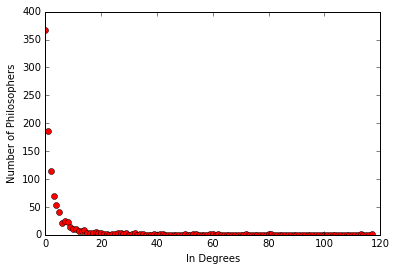

In [16]:
import numpy as np

bins_in = range(min(in_deg_values),max(in_deg_values))
hist_in, _ = np.histogram(in_deg_values, max(in_deg_values)-min(in_deg_values))

plt.plot(bins_in,hist_in,'ro')
plt.xlabel('In Degrees')
plt.ylabel('Number of Philosophers')



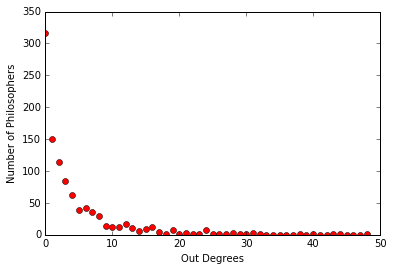

In [17]:
import numpy as np

bins_out = range(min(out_deg_values),max(out_deg_values))
hist_out, _ = np.histogram(out_deg_values, max(out_deg_values)-min(out_deg_values))

plt.plot(bins_out,hist_out,'ro')
plt.xlabel('Out Degrees')
plt.ylabel('Number of Philosophers')




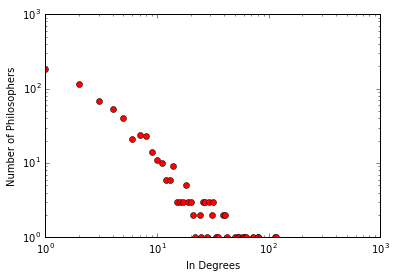

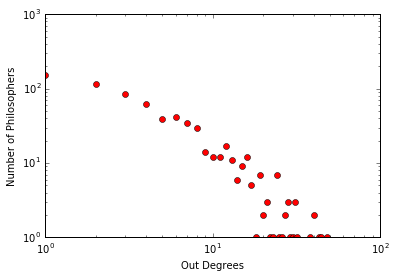

In [18]:
plt.figure()
plt.loglog()
plt.plot(bins_in,hist_in,'ro')
plt.xlabel('In Degrees')
plt.ylabel('Number of Philosophers')


plt.figure()
plt.loglog()
plt.plot(bins_out,hist_out,'ro')
plt.xlabel('Out Degrees')
plt.ylabel('Number of Philosophers')


For the in degree and out degree, the most common value is 0. The distribution for the in degree is following a power law, with just a little noise. In both the plots (linear and logarithmic) the values are following the BA distribution seen above in this assignment.

On the contrary, the out degrees seem to follow a slightly random law (still, mainly following a power law distribution). For example, a peak in the 0 value is the same of the power law distribution, but the maimum degree is very low if compared to the one of the in edges. On the other hand, the loglog plot shows a distribution that is ar-like as the random one, still following an almost-linear decrease as the power law predicts.

This makes perfectly sense: in a real network as the one that this exercise mocks, there are hubs that, once are growing, keep receiving links (i.e. citations). In this case, once a philosopher gets a lot of citations, it becomes more famous (or, more probably, he is already famous) so it gets more citations. This brings the in-citations to follow a power law. On the other hand, if the page of a philosopher cites a lot of philosophers (outbound links), this does not always mean that the philosopher is famous, or that in the future he will more likely have other philosophers cited in his page. as a consequence, the out-bound links look like a power law with random noise in it.

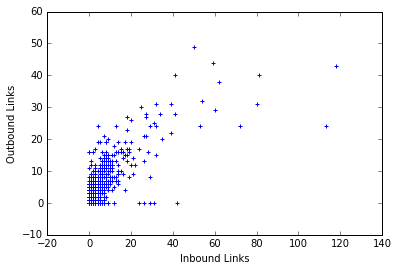

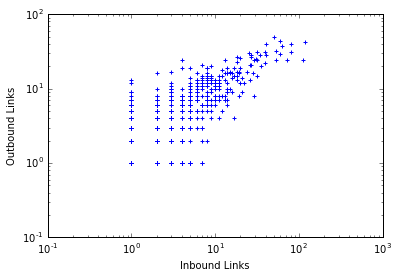

In [19]:
#scattered plot:

in_ordered = []
out_ordered = []
for ph in in_degree.keys():
    in_ordered.append(in_degree.get(ph))
    out_ordered.append(out_degree.get(ph))


plt.figure()
plt.scatter(in_ordered, out_ordered, marker='+')
plt.xlabel('Inbound Links')
plt.ylabel('Outbound Links')


plt.figure()
plt.loglog()
plt.scatter(in_ordered, out_ordered, marker='+')
plt.xlabel('Inbound Links')
plt.ylabel('Outbound Links')



The two values are strongly correlated, i.e. one of them grows almost linearly with the other, approximately. This means that the most cited pages of philosophers are also the ones that cite the most philisophers, that makes sense: if a page is often visited, it is also often improved, and other links are added. Most of the philosophers tend to have less than 20 outbound and less than 20 inbound links.

One philosopher stands out, i.e. Kant, that has the greatest number of inbound links and one of the greatest number of outbound! Also, one philosopher has more than 40 inbound links, without having any outbound link! Noteworthy that no philosopher has more than 20 outbound links without having at least one inbound link.